In [1]:
import numpy as np
import pandas as pd 

In [2]:
# importing dataset
df = pd.read_csv('datasets/lab2_q1.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [3]:
# getting the dimension
df.shape

(768, 9)

In [4]:
# splitting the data
X_train, y_train = (df.iloc[0 : 537]).drop(columns=['Y']), ((df.iloc[0 : 537])[['Y']]).values
X_test, y_test = (df.iloc[537 : 652]).drop(columns=['Y']), (df.iloc[537 : 652])[['Y']].values
X_val, y_val = (df.iloc[652 : 767]).drop(columns=['Y']), (df.iloc[652 : 767])[['Y']].values

# getting shapes
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_val.shape, y_val.shape) 

(((537, 8), (537, 1)), ((115, 8), (115, 1)), ((115, 8), (115, 1)))

In [5]:
def add_ones_to_matrix(matrix):
    X = np.hstack((np.ones((matrix.shape[0], 1)), matrix))   # adding row with 1s in X for theta_0
    return X

X_train = add_ones_to_matrix(X_train)
X_test = add_ones_to_matrix(X_test)
X_val = add_ones_to_matrix(X_val)
X_train.shape  ## should be (537, 9)

(537, 9)

In [6]:
# these are the optimal parameters (theta_1)
def thetas_for(X, y):
    theta_1 = np.linalg.solve(X.T@X, X.T@y)
    return theta_1
thetas_for(X_train, y_train)

array([[ 5.62708714e+01],
       [-5.14164985e+01],
       [-9.19059027e+09],
       [ 9.19059027e+09],
       [ 1.83811805e+10],
       [ 4.57221092e+00],
       [-2.47757831e-02],
       [ 2.39218378e+01],
       [ 2.45127128e-01]])

In [7]:
# ml_model
def predictions(X, y):
    y_hat = X @ thetas_for(X, y)
    return y_hat

# loss_function
def loss_fnc(y_hat, y):
    sum = np.mean((y_hat - y)**2)
    return sum 

In [8]:
# finding errors
train_error = loss_fnc(predictions(X_train, y_train), y_train)
val_error = loss_fnc(predictions(X_val, y_val), y_val)
test_error = loss_fnc(predictions(X_test, y_test), y_test)
train_error, val_error, test_error

(np.float64(8.514044787435981),
 np.float64(5.587613742681957),
 np.float64(8.11277013519749))

In [17]:
# gradient descent for optimal parameters theta_2
def gradient_descent(X_train, y_train, X_val, y_val, lr):
    epochs = 50
    n_samples, n_features = X_train.shape
    train_errors =[]
    val_errors = []
    grad_magnitudes = []
    thetas_2 = np.zeros((n_features, 1))
    for i in range(epochs):
        y_hat = (X_train @ thetas_2).reshape(-1, 1)
        #gradient
        grad = (2/n_samples) * X_train.T @ (y_hat - y_train)
        thetas_2 -= lr * grad
        #train and val loss for each epoch
        train_errors.append(loss_fnc(X_train@thetas_2, y_train))
        val_errors.append(loss_fnc(X_val@thetas_2, y_val))
        grad_magnitudes.append(np.linalg.norm(grad))
    return thetas_2, train_errors, val_errors, grad_magnitudes

In [18]:
thetas_2, train_errors, val_errors, grad_magnitudes = gradient_descent(X_train, y_train, X_val, y_val, lr=0.000001)

In [11]:
import matplotlib.pyplot as plt

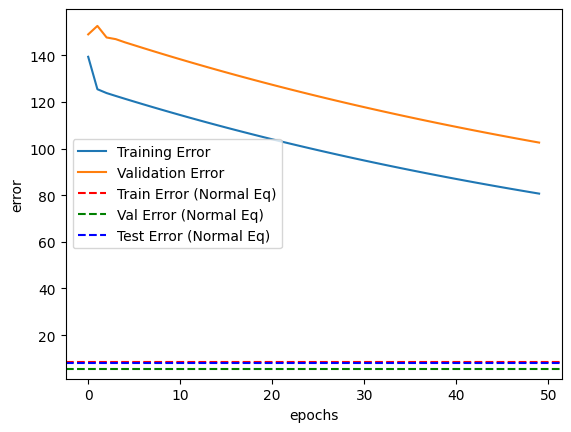

In [19]:
# plotting
plt.plot(range(50), train_errors, label='Training Error')
plt.plot(range(50), val_errors, label='Validation Error')
plt.xlabel('epochs')
plt.ylabel('error')
plt.axhline(train_error, c='r', linestyle='--', label='Train Error (Normal Eq)')
plt.axhline(val_error, c='g', linestyle='--', label='Val Error (Normal Eq)')
plt.axhline(test_error, c='b', linestyle='--', label='Test Error (Normal Eq)')
plt.legend()

Text(0, 0.5, 'grad_magnitude')

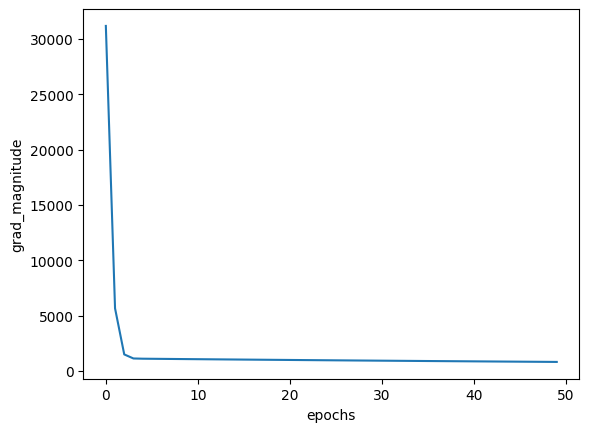

In [20]:
plt.plot(range(50), grad_magnitudes, label='Gradient Magnitude')
plt.xlabel('epochs')
plt.ylabel('grad_magnitude')

In [22]:
# fine tuning the learning rate
learning_rates = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001]
best_val_error = None
for lr in learning_rates:
    theta, train_err, val_err, grad_mag = gradient_descent(X_train, y_train, X_val, y_val, lr)
    current_val_error = min(val_err)
    # for the first iteration to get something instead of none
    if best_val_error is None: 
        best_val_error = current_val_error
        best_lr = lr
        best_results = (theta, train_err, val_err, grad_mag)
    else:
        if current_val_error < best_val_error:
            best_val_error = current_val_error
            best_lr = lr
            best_results = (theta, train_err, val_err, grad_mag)

print("Best learning rate:", best_lr)

Best learning rate: 1e-06
